In [110]:
from imports import *

# ACQUIRE

In [111]:
# Acquire data from SQL using module found in wrangle.py
df = wrangle.get_zillow()
# Obtain number of rows and columns for orginal dataframe
df.shape

Reading from csv file...


(77381, 67)

# PREPARE

## PREPARE - SINGLE FAMILY HOMES

In [112]:
def single_family_homes(df):
    # Restrict df to only properties that meet single unit criteria

    #261: Single Family Residential, #262: Rural Residence, #263: Mobile Homes, 
    #264: Townhomes, #265 Cluster Homes, #266: Condominium, #268: Row House, 
    #273 Bungalow, #275 Manufactured, #276 Patio Home, #279 Inferred Single Family Residence

    single_use = [261, 262, 263, 264, 265, 266, 268, 273, 275, 276, 279]
    df = df[df.propertylandusetypeid.isin(single_use)]

    # Restrict df to only those properties with at least 1 bath & bed and > 400 sqft area (to not include tiny homes)
    
    df = df[(df.bedroomcnt > 0) & (df.bathroomcnt > 0) & ((df.unitcnt<=1)|df.unitcnt.isnull()) & (df.calculatedfinishedsquarefeet>400)]

    return df

In [113]:
df = single_family_homes(df)

In [114]:
df.shape

(71548, 67)

## PREPARE - MISSING VALUES

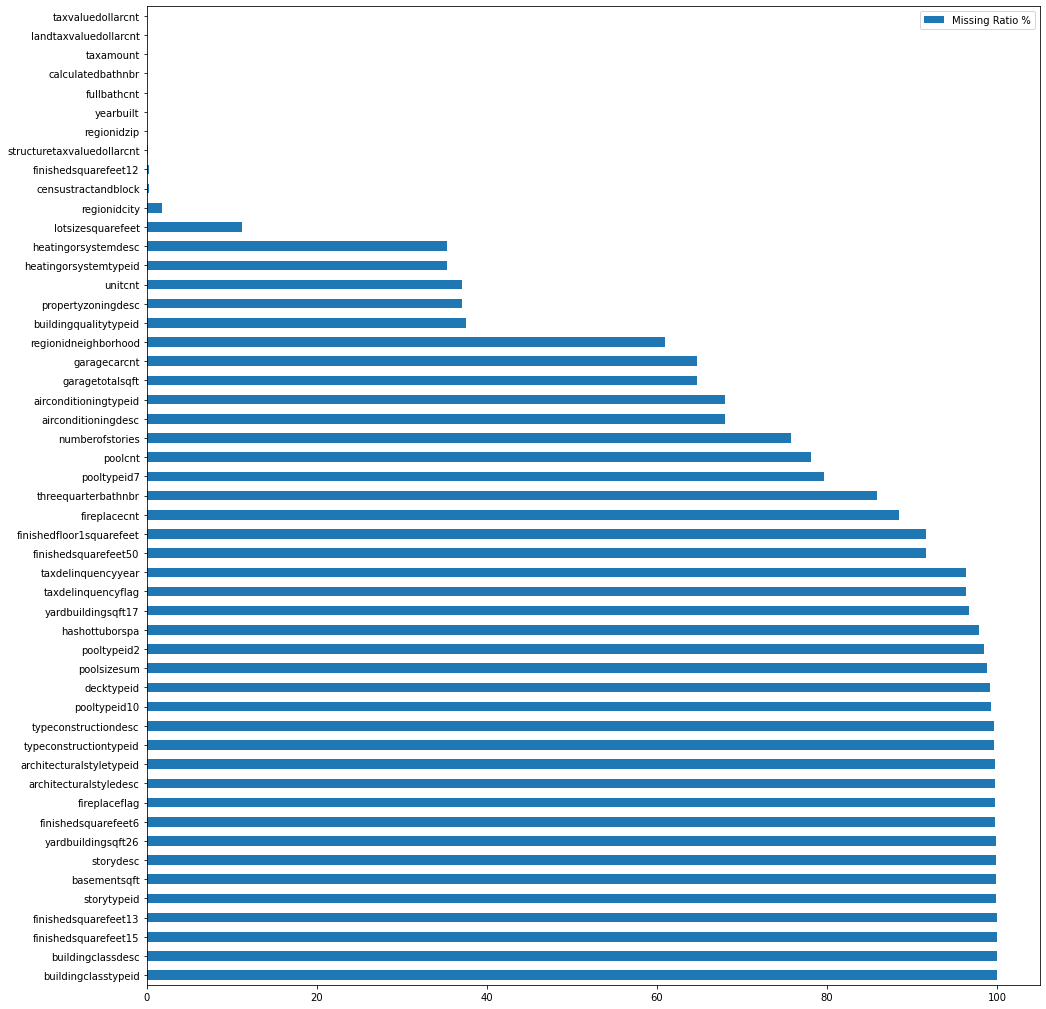

In [122]:
def plot_nas(df: pd.DataFrame):
    if df.isnull().sum().sum() != 0:
        na_df = (df.isnull().sum() / len(df)) * 100      
        na_df = na_df.drop(na_df[na_df == 0].index).sort_values(ascending=False)
        missing_data = pd.DataFrame({'Missing Ratio %' :na_df})
        missing_data.plot(kind = "barh")
        plt.show()
    else:
        print('No NAs found')
plot_nas(df)

In [6]:
def missing_values_per_column(df):
# identifies nulls by column, creates a dataframe to display counts and percent of nulls by column
    missing_in_columns = pd.concat([
        df.isna().sum().rename('count').sort_values(ascending = False),
        df.isna().mean().rename('percent')
    ], axis=1)
    return missing_in_columns


In [7]:
missing_values_per_column(df)

,count,percent
buildingclasstypeid,71548,1.00
buildingclassdesc,71548,1.00
finishedsquarefeet15,71539,1.00
finishedsquarefeet13,71522,1.00
basementsqft,71498,1.00
storydesc,71498,1.00
storytypeid,71498,1.00
yardbuildingsqft26,71479,1.00
finishedsquarefeet6,71392,1.00
fireplaceflag,71376,1.00


In [8]:
def remove_columns(df, cols_to_remove = ['censustractandblock','finishedsquarefeet12','buildingqualitytypeid', 'heatingorsystemtypeid', 'propertyzoningdesc', 'heatingorsystemdesc', 'unitcnt']):
#removes columns that will not be used in the exploration and modeling phases of the pipeline
    df = df.drop(columns=cols_to_remove)
    return df

In [9]:
df = remove_columns(df, cols_to_remove = ['censustractandblock','finishedsquarefeet12','buildingqualitytypeid', 'heatingorsystemtypeid', 'propertyzoningdesc', 'heatingorsystemdesc', 'unitcnt'])
df.head().T

,0,1,2,3,4
parcelid,14297519,17052889,14186244,12177905,10887214
airconditioningtypeid,NaN,NaN,NaN,NaN,1.00
architecturalstyletypeid,NaN,NaN,NaN,NaN,NaN
basementsqft,NaN,NaN,NaN,NaN,NaN
bathroomcnt,3.50,1.00,2.00,3.00,3.00
bedroomcnt,4.00,2.00,3.00,4.00,3.00
buildingclasstypeid,NaN,NaN,NaN,NaN,NaN
calculatedbathnbr,3.50,1.00,2.00,3.00,3.00
decktypeid,NaN,NaN,NaN,NaN,NaN
finishedfloor1squarefeet,NaN,"1,465.00",NaN,NaN,NaN


In [10]:
df.shape

(71548, 60)

In [11]:
missing_values_per_column(df)

,count,percent
buildingclasstypeid,71548,1.00
buildingclassdesc,71548,1.00
finishedsquarefeet15,71539,1.00
finishedsquarefeet13,71522,1.00
basementsqft,71498,1.00
storydesc,71498,1.00
storytypeid,71498,1.00
yardbuildingsqft26,71479,1.00
finishedsquarefeet6,71392,1.00
fireplaceflag,71376,1.00


- Observation:
Willl drop columns with more than 60% missing 

In [12]:
def missing_values_per_row(df):
# identifies nulls by row, creates a dataframe to display counts and percent of nulls by row
    missing_in_rows = pd.concat([
        df.isna().sum(axis=1).rename('n_cols_missing'),
        df.isna().mean(axis=1).rename('percent_missing'),
        ], axis=1).value_counts().to_frame(name='row_counts').sort_index().reset_index()
 
    return missing_in_rows

In [13]:
missing_values_per_row(df)

,n_cols_missing,percent_missing,row_counts
0,19,0.32,2
1,20,0.33,5
2,21,0.35,24
3,22,0.37,98
4,23,0.38,310
5,24,0.40,485
6,25,0.42,569
7,26,0.43,1069
8,27,0.45,2845
9,28,0.47,3929


In [14]:
def handle_missing_values(df, prop_required_column = .5, prop_required_row = .5):
# Drops missing values based upon a set threshold. It filters columns first and then rows, dropping columns and then rows with >= 50% missing values. 
    threshold = int(round(prop_required_column*len(df.index),0))
    df.dropna(axis=1, thresh=threshold, inplace=True)
    threshold = int(round(prop_required_row*len(df.columns),0))
    df.dropna(axis=0, thresh=threshold, inplace=True)
    return df

In [15]:
df = handle_missing_values(df, prop_required_column = .5, prop_required_row = .5)
df.shape

(71548, 26)

## PREPARE - DATA PREP

In [16]:
def data_prep(df, prop_required_column=.5, prop_required_row=.5):
    
    df = handle_missing_values(df, prop_required_column, prop_required_row)
   
    # Make categorical column for location based upon the name of the county that belongs to the cooresponding state_county_code (fips code)
    df['county_code_bin'] = pd.cut(df.fips, bins=[0, 6037.0, 6059.0, 6111.0], 
                             labels = ['Los Angeles County', 'Orange County',
                             'Ventura County'])
   
    # Make dummy columns for state_county_code using the binned column for processin gin modeling later. 
    dummy_df = pd.get_dummies(df[['county_code_bin']], dummy_na=False, drop_first=[True])
    
    # Add dummy columns to dataframe
    df = pd.concat([df, dummy_df], axis=1)
    
    # Make categorical column age of the home.
    df['age'] = 2017 - df.yearbuilt
    df['age_bin'] = pd.cut(df.age, 
                           bins = [0, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140],
                           labels = [0, .066, .133, .20, .266, .333, .40, .466, .533, 
                                     .60, .666, .733, .8, .866, .933])
    
    # Make categorical column for square_feet.
    df['home_sizes'] = pd.cut(df.calculatedfinishedsquarefeet, bins=[0, 1800, 4000, 6000, 25000], 
                             labels = ['Small: 0 - 1799sqft',
                             'Medium: 1800 - 3999sqft', 'Large: 4000 - 5999sqft', 'Extra-Large: 6000 - 25000sqft'])
    
    # create acres variable
    df['acres'] = df.lotsizesquarefeet/43560

    # bin acres
    df['acres_bin'] = pd.cut(df.acres, bins = [0, .10, .15, .25, .5, 1, 5, 10, 20, 50, 200], 
                       labels = [0, .1, .2, .3, .4, .5, .6, .7, .8, .9])

    
    # Make categorical column for total_rooms, combining number of bedrooms and bathrooms.
    df['total_rooms'] = df['bedroomcnt'] + df['bathroomcnt']
    
    # Make categorical column for bedrooms.
    df['bedroom_bins'] = pd.cut(df.bedroomcnt, bins=[0, 2, 4, 6, 15], 
                             labels = ['Small: 0-2 bedrooms',
                             'Medium: 3-4 bedrooms', 'Large: 5-6 bedrooms', 'Extra-Large: 7-15 bedrooms'])
    
    # Make categorical column for square_feet.
    df['bathroom_bins'] = pd.cut(df.bathroomcnt, bins=[0, 2, 4, 6, 15], 
                             labels = ['Small: 0-2 bathrooms','Medium: 3-4 bathrooms', 'Large: 5-6 bathrooms', 
                                       'Extra-Large: 8-15 bathrooms'])
    df = df.dropna()
    print(df.shape)
    return df


In [17]:
df = data_prep(df, prop_required_column=.5, prop_required_row=.5)
## This looks correct, but when I check the number of counts per column and row it shows 5 rows (see below). 

(62210, 37)


In [18]:
df.county_code_bin.value_counts()

Los Angeles County    43093
Orange County         14019
Ventura County         5098
Name: county_code_bin, dtype: int64

In [19]:
missing_values_per_column(df)

,count,percent
parcelid,0,0.00
taxvaluedollarcnt,0,0.00
landtaxvaluedollarcnt,0,0.00
taxamount,0,0.00
logerror,0,0.00
transactiondate,0,0.00
propertylandusedesc,0,0.00
county_code_bin,0,0.00
county_code_bin_Orange County,0,0.00
county_code_bin_Ventura County,0,0.00


In [20]:
missing_values_per_row(df)

,n_cols_missing,percent_missing,row_counts
0,0,0.00,62210


In [21]:
df.isna().sum()

parcelid                          0
bathroomcnt                       0
bedroomcnt                        0
calculatedbathnbr                 0
calculatedfinishedsquarefeet      0
fips                              0
fullbathcnt                       0
latitude                          0
longitude                         0
lotsizesquarefeet                 0
propertycountylandusecode         0
propertylandusetypeid             0
rawcensustractandblock            0
regionidcity                      0
regionidcounty                    0
regionidzip                       0
roomcnt                           0
yearbuilt                         0
structuretaxvaluedollarcnt        0
taxvaluedollarcnt                 0
assessmentyear                    0
landtaxvaluedollarcnt             0
taxamount                         0
logerror                          0
transactiondate                   0
propertylandusedesc               0
county_code_bin                   0
county_code_bin_Orange Count

## PREPARE - SUMMARY STATISTICS

In [22]:
wrangle.summary_info(df)

--- Shape: (62210, 37)
--- Descriptions
                   parcelid          bathroomcnt           bedroomcnt  \
count             62,210.00            62,210.00            62,210.00   
unique                  NaN                  NaN                  NaN   
top                     NaN                  NaN                  NaN   
freq                    NaN                  NaN                  NaN   
mean          12,829,026.92                 2.28                 3.10   
std            2,110,951.13                 0.96                 0.99   
min           10,711,855.00                 1.00                 1.00   
25%           11,472,960.00                 2.00                 2.00   
50%           12,445,641.50                 2.00                 3.00   
75%           14,035,317.50                 3.00                 4.00   
max          162,960,814.00                13.00                11.00   

          calculatedbathnbr  calculatedfinishedsquarefeet  \
count             62,2

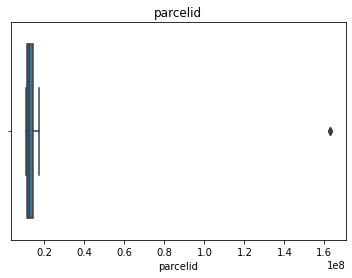

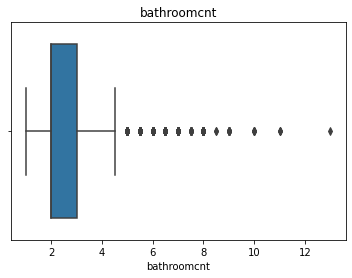

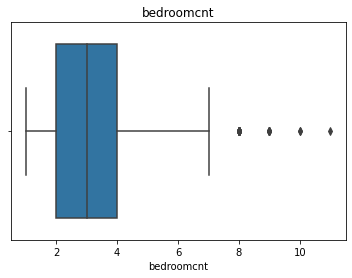

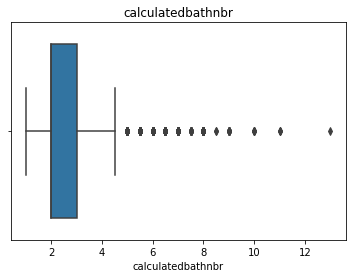

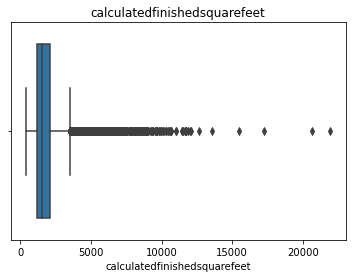

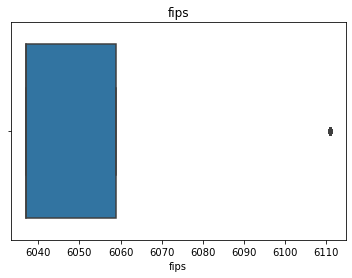

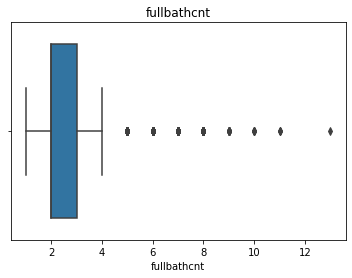

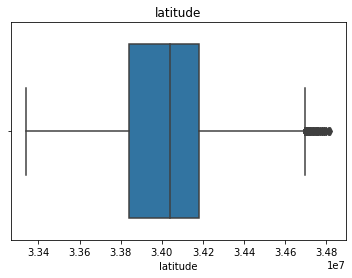

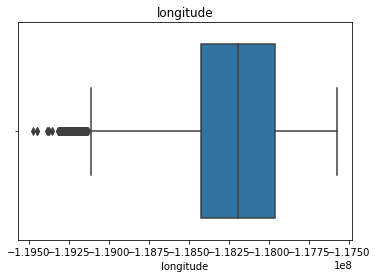

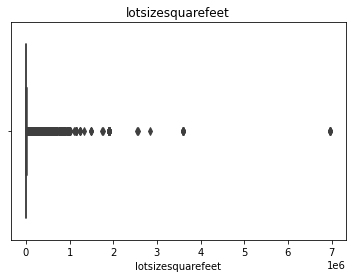

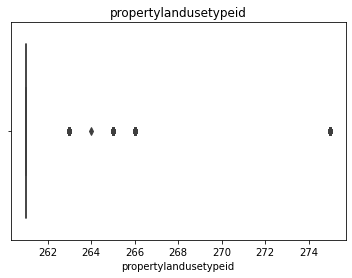

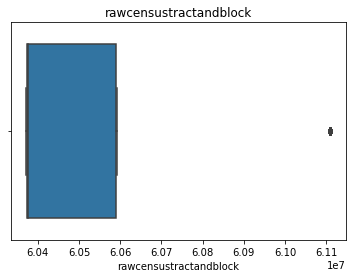

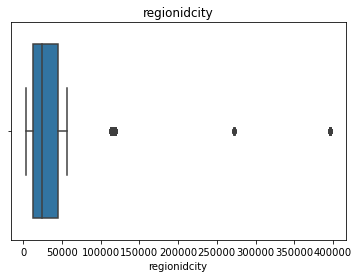

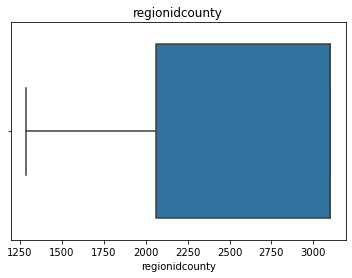

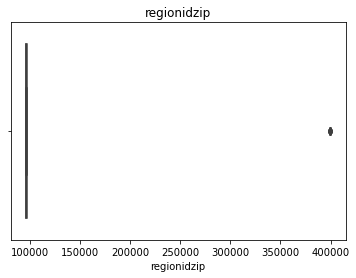

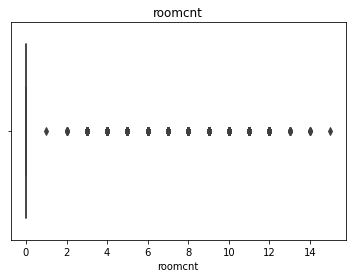

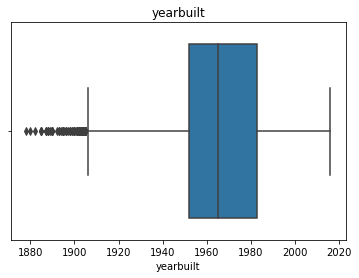

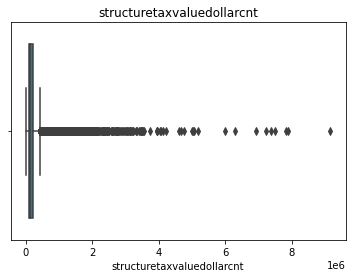

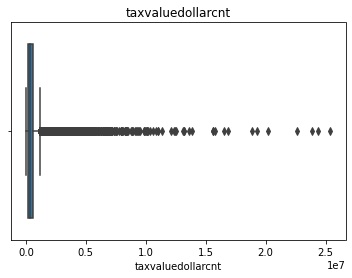

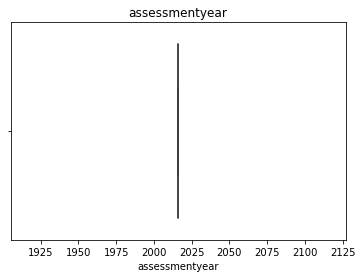

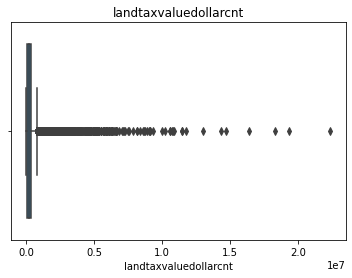

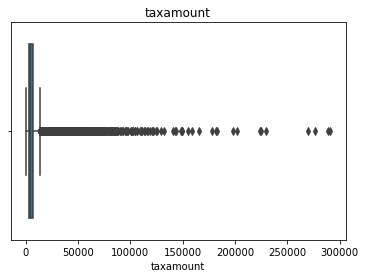

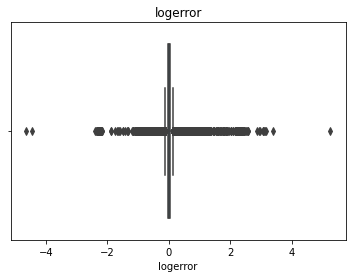

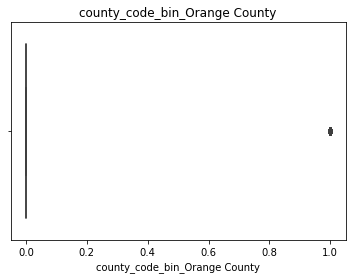

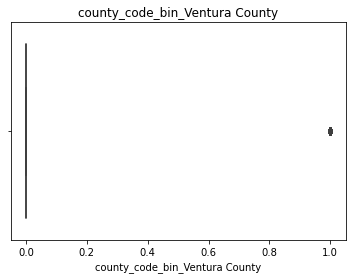

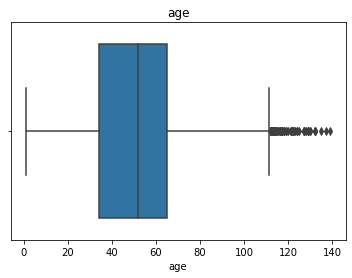

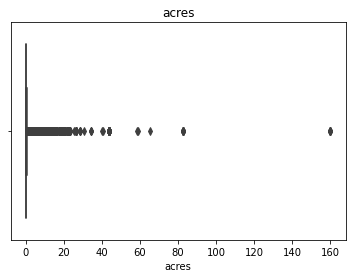

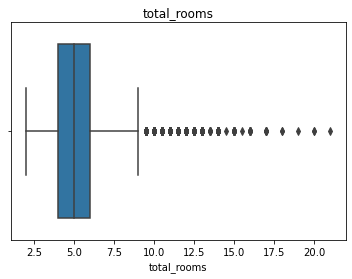

In [23]:
for col in df.select_dtypes('number'):
    sns.boxplot(df[col])
    plt.title(col)
    plt.show()

### Observations of univariate visualizations
-
-
-


[(0.0, 2.0)]

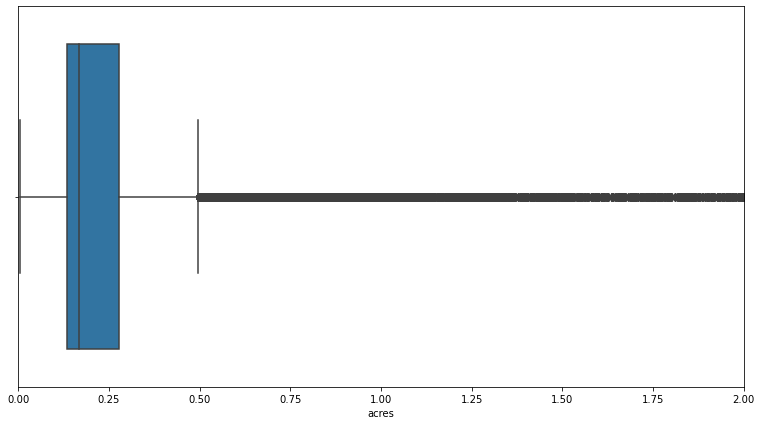

In [24]:
# Set size of figure
plt.figure(figsize = (13,7))
# Create histogram
ax = sns.boxplot(data=df, x= 'acres')
# set x and y limits to 'zoom in'
ax.set(xlim = (0,2)) # set the limits to the desired ones

- Remove extremes in bedrooms and baths, we will keeps homes with between 1 and 7 baths, between 0 and 7 bedrooms

- There is an error in zip, so we will remove those whose zips are invalid numbers (> 99999).

- remove square feet > 10000 for now  # investigate how many properties your outlier limits may impact

- remove lot size > ________ for now

## PREPARE - REMOVE OUTLIERS

In [25]:
'''
def remove_outliers():
    
    remove outliers in bed, bath, zip, lotsizesquarefeet, square feet


    return df[((df.bathroomcnt <= 7) & (df.bedroomcnt <= 7) & 
               (df.regionidzip < 100000) & 
               (df.bathroomcnt > 0) & 
               (df.bedroomcnt > 0) & 
               (df.lotsizesquarefeet < 20000) &
               (df.calculatedfinishedsquarefeet < 10000)
              )]
'''           

'\ndef remove_outliers():\n    \n    remove outliers in bed, bath, zip, lotsizesquarefeet, square feet\n\n\n    return df[((df.bathroomcnt <= 7) & (df.bedroomcnt <= 7) & \n               (df.regionidzip < 100000) & \n               (df.bathroomcnt > 0) & \n               (df.bedroomcnt > 0) & \n               (df.lotsizesquarefeet < 20000) &\n               (df.calculatedfinishedsquarefeet < 10000)\n              )]\n'

In [26]:
'''
df = remove_outliers()

# Now that the most extreme outliers have been removed, let's look at the summary statistics of each numeric field. 
df.describe().T
'''

"\ndf = remove_outliers()\n\n# Now that the most extreme outliers have been removed, let's look at the summary statistics of each numeric field. \ndf.describe().T\n"

In [27]:
df.shape

(62210, 37)

## PREPARE - SPLIT

In [28]:
train, validate, test = wrangle.split_data(df)

Train: 34837 rows, 37 cols
Validate: 14931 rows, 37 cols
Test: 12442 rows, 37 cols


In [29]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34837 entries, 54314 to 42293
Data columns (total 37 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   parcelid                        34837 non-null  int64   
 1   bathroomcnt                     34837 non-null  float64 
 2   bedroomcnt                      34837 non-null  float64 
 3   calculatedbathnbr               34837 non-null  float64 
 4   calculatedfinishedsquarefeet    34837 non-null  float64 
 5   fips                            34837 non-null  float64 
 6   fullbathcnt                     34837 non-null  float64 
 7   latitude                        34837 non-null  float64 
 8   longitude                       34837 non-null  float64 
 9   lotsizesquarefeet               34837 non-null  float64 
 10  propertycountylandusecode       34837 non-null  object  
 11  propertylandusetypeid           34837 non-null  float64 
 12  rawcensustract

# EXPLORE

### Explore - Univariate

[(-1.0, 1.0), (0.0, 1500.0)]

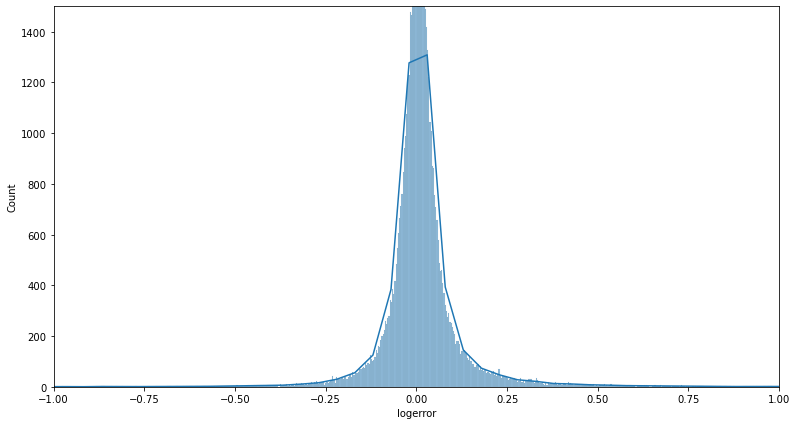

In [30]:
# Set size of figure
plt.figure(figsize = (13,7))
# Create histogram
ax = sns.histplot(data=df, x="logerror", kde=True)
# set x and y limits to 'zoom in'
ax.set(xlim = (-1, 1), ylim = (0, 1500)) # set the limits to the desired ones

[(-1.0, 1.0), (0.0, 1500.0)]

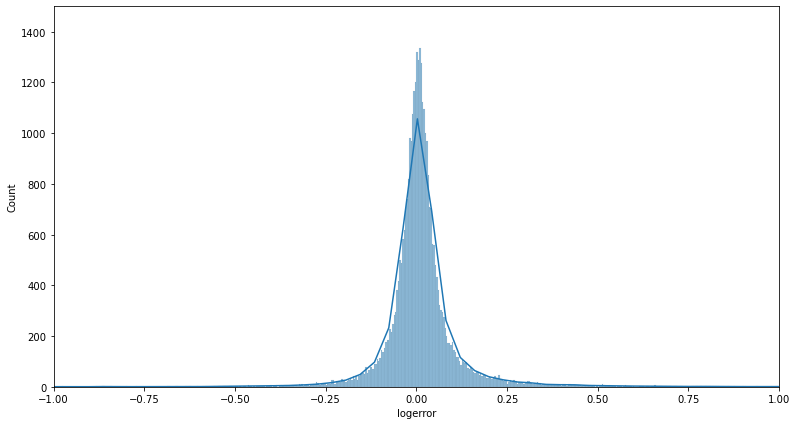

In [31]:
plt.figure(figsize = (13,7))
# Create histogram
ax = sns.histplot(data=train, x="logerror", kde=True)
# set x and y limits to 'zoom in'
ax.set(xlim = (-1, 1), ylim = (0, 1500)) # set the limits to the desired ones

### Observations: 
- Appears as a normal distribution.

### Explore - Bivariate

In [32]:
train['logerror_bins'] = pd.cut(train.logerror, [-5, -.2, -.05, .05, .2, 4])

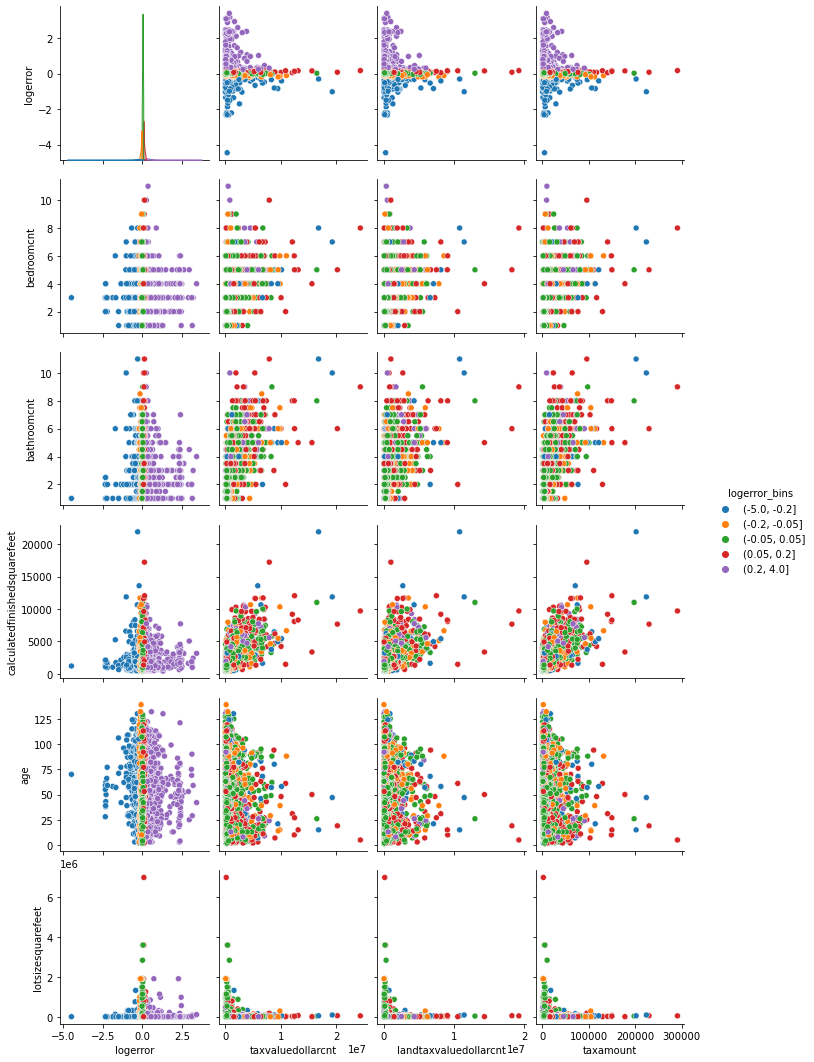

In [33]:
sns.pairplot(data = train, hue = 'logerror_bins', 
             x_vars = ['logerror', 'taxvaluedollarcnt', 'landtaxvaluedollarcnt', 'taxamount'],
             y_vars = ['logerror', 'bedroomcnt', 'bathroomcnt', 'calculatedfinishedsquarefeet', 'age', 'lotsizesquarefeet'])

### Observations:
- logerror higher with odd numbers of bedrooms
- logerror higher when bathrooms have complete number; lower logerror with halfbaths
- logerror higher with calculated squarefeet > 4000
- logerror higher with homes ages between 5 and 80; tend to zillow model tends to overestimate with age
- need to look at lotsize and log error in more detail to see if there is a relationship
- logerror higher with homes that have taxvaluedollarcnt & landtaxvaluedoallarcnt < 500_000, and taxamount < 50_000

Error is greatest for the properties sitting on smaller land. Error is greatest for properties with fewer square feet. Error is greatest for properties with 1 or 2 bathrooms. Error is greatest for locations in the southern to center (S-N) of the county. Error is greatest for locations in the center (W-E) of the county as opposed to on the coastline or far eastern edge. Error is greatest and positive for the lower structure dollar per square feet, indicating the properties tax value is underrepresenting the future sale price. Error is greatest the the lower and more common tax rates. Error is greatest for homes where the number of bathrooms <= number of bedrooms.



## EXPLORE - QUESTIONS

### Questions

- 1. Is there a relationship between logerror and *lot size* in each county?
- 2. Is there a relationship between logerror and finished square footage of the property in each county?
- 3. Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?
- 4. Is there a relationship between logerror and zipcode?
- 5. Controlling for property square footage, what is the relationship between logerror and age of the home?

### QUESTION 1: 

- 1. Is there a relationship between logerror and *lot size* square footage in each county?

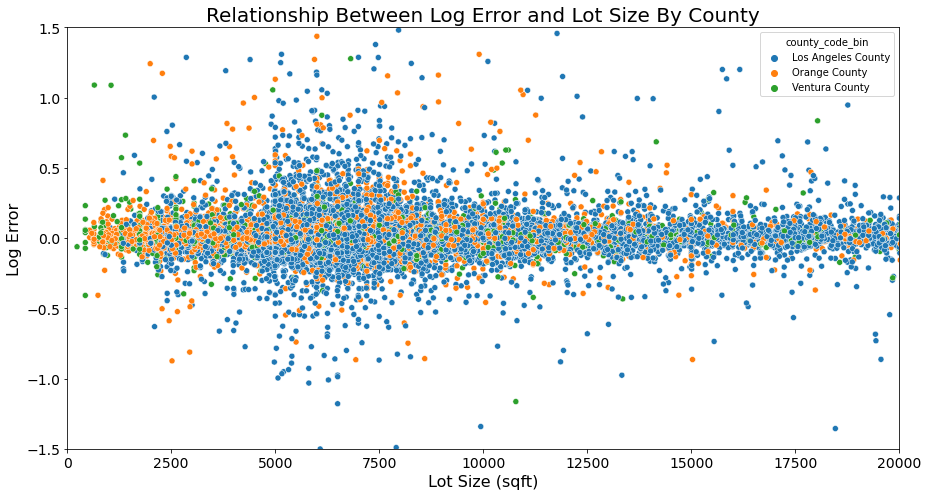

In [34]:
x = train.lotsizesquarefeet
y = train.logerror
# Set size of figure
plt.figure(figsize = (13,7))
# Create scatterplot
ax = sns.scatterplot(data=train, x= x, y= y, hue="county_code_bin")
# set x and y limits to 'zoom in'
ax.set(xlim = (0, 20000), ylim= (-1.5,1.5)) # set the limits to the desired ones
# fit labels and legend
plt.title('Relationship Between Log Error and Lot Size By County', fontsize = 20)
plt.xlabel('Lot Size (sqft)', fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.ylabel('Log Error', fontsize = 16)


plt.tight_layout() 
plt.show()

<Figure size 936x504 with 0 Axes>

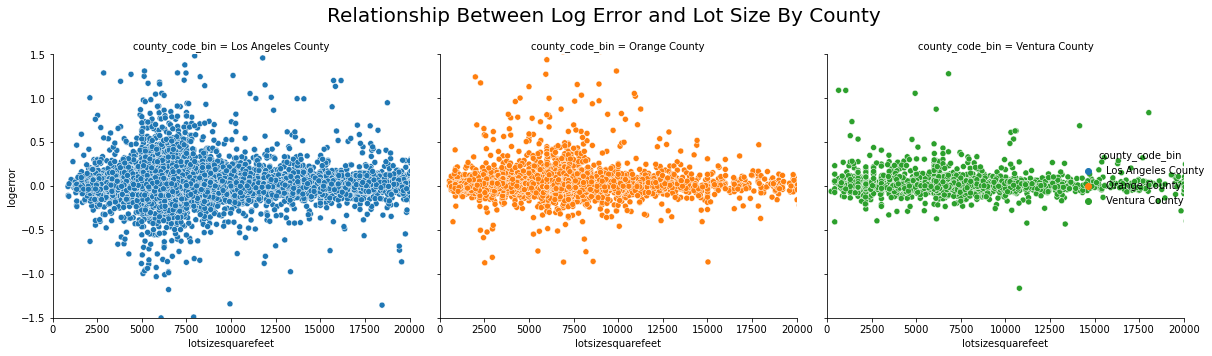

In [35]:
x = train.lotsizesquarefeet
y = train.logerror
# Set size of figure
plt.figure(figsize = (13,7))
# Create scatterplot
ax = sns.relplot(data=train, x= x, y= y, hue="county_code_bin", col="county_code_bin")
# set x and y limits to 'zoom in'
ax.set(xlim = (0, 20000), ylim= (-1.5,1.5)) # set the limits to the desired ones
# fit labels and legend
plt.suptitle('Relationship Between Log Error and Lot Size By County', fontsize = 20)
plt.yticks(fontsize = 14)
plt.ylabel('Log Error', fontsize = 16)


plt.tight_layout() 
plt.show()

#### Observations
- LA County adn Orange County have more log error in homes with a logerror between 3000 - 8000 sqft. 
- Is logerror significntly different for homes with lot sizes between 3000-8000 sqft?

#### Hypothesis Testing - Pearson's R
Pearson's R was used because both lotsize and logerror are continuous variables. 

In [36]:
# H0 - There is no linear relationship between lot size and logerror.
# H1 - There is a linear realtionship between lot size and log error.
α = 0.05
r, p = stats.pearsonr(x,y)
print('r =', r)
print('p =', p)
if p < α:
    print("We reject the H0.")
else:
    print("We fail to reject the H0.")

r = 0.014234347095347913
p = 0.007887838319365754
We reject the H0.


#### Further testing to obtain correlation between lot size and log error by county.

In [37]:
train.groupby('county_code_bin').apply(lambda subset: stats.pearsonr(subset.lotsizesquarefeet, subset.logerror))

county_code_bin
Los Angeles County    (0.021971081978901626, 0.0006370995350262187)
Orange County          (0.07341178398232218, 8.211038707879318e-11)
Ventura County         (-0.025784664489960703, 0.16773196978009147)
dtype: object

### ANSWER 1.

### Question 2:

- 2. Is there a relationship between logerror and finished square footage of the property in each county?

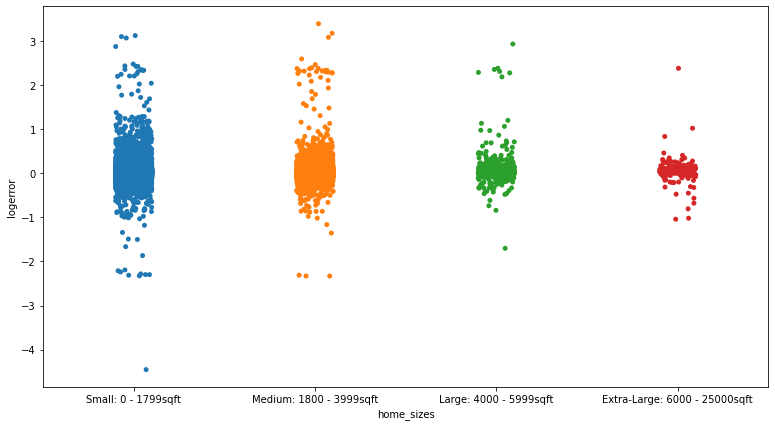

In [38]:
x = train.home_sizes
y = train.logerror
plt.figure(figsize = (13,7))
ax = sns.stripplot(x=x, y=y, data= train.sample(1000))

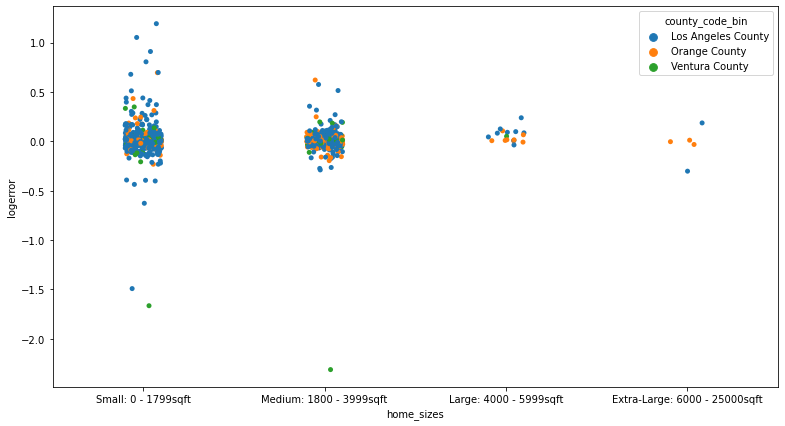

In [39]:
x = 'home_sizes'
y = 'logerror'
plt.figure(figsize = (13,7))
ax = sns.stripplot(x=x, y=y, hue='county_code_bin', data= train.sample(1000))

#### Hypothesis Testing - 1-Tailed, 1-Sample T-Test - Mean of Subgroup vs. Mean of Overall
T-Test was used to compare the mean of logerror of a sample against the mean logerror overall

- H$_{0}$: Mean of logerror in houses of less than 4000 square feet <= Mean logerror of all home sizes
- H$_{a}$: Mean of logerror in houses of less than 4000 square feet  > Mean logerror of all home sizes

In [107]:
alpha = 0.05
logerror_small_med= train[(train.home_sizes.str.startswith('Small'))| (train.home_sizes.str.startswith('Medium'))].logerror
overall_mean = train.logerror.mean()
t, p = stats.ttest_1samp(logerror_small_med, overall_mean)

print(t, p/2, alpha)

if p/2 > alpha:
    print("We fail to reject the null hypothesis.")
elif t < 0:
    print("We fail to reject the null hypothesis.")
else:
    print("We reject the null hypothesis.")

-1.4707460234161713 0.07068455740142182 0.05
We fail to reject the null hypothesis.


In [ ]:
# H0 - There is no linear relationship between square footage and logerror.
# H1 - There is a linear realtionship between square footage and logerror.
α = 0.05
r, p = stats.pearsonr(x,y)
print('r =', r)
print('p =', p)
if p < α:
    print("We reject the H0.")
else:
    print("We fail to reject the H0.")

In [108]:
# ttest_ind(homesize_group1, homesize_group2)

NameError: name 'ttest_ind' is not defined

### Question 3: 

- 3. Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?

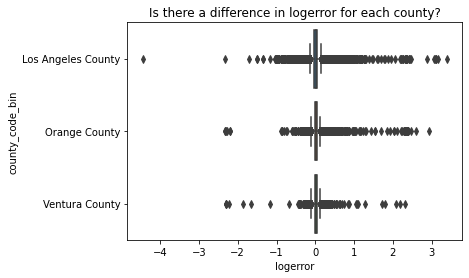

In [41]:
sns.boxplot(train.logerror, train.county_code_bin)
plt.title("Is there a difference in logerror for each county?")
plt.show()

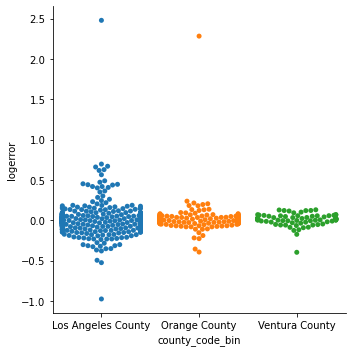

In [42]:
x= 'county_code_bin'
y = 'logerror'
sns.catplot(x=x, y=y, data= train.sample(1000), kind='swarm')

### Observations
 - Los Angeles County has a wider variance, followed by Orange County then Ventura. 

- 4. Is there a relationship between logerror and zipcode?

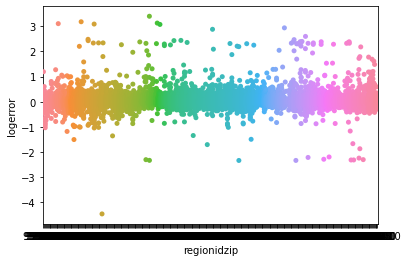

In [43]:
x= 'regionidzip'
y = 'logerror'
ax = sns.stripplot(x=x, y=y, data= train)

In [44]:
# catplot strip....based upon observation use hue or col to bring other feature into view

- 5. Controlling for property square footage, what is the relationship between logerror and age of the home?

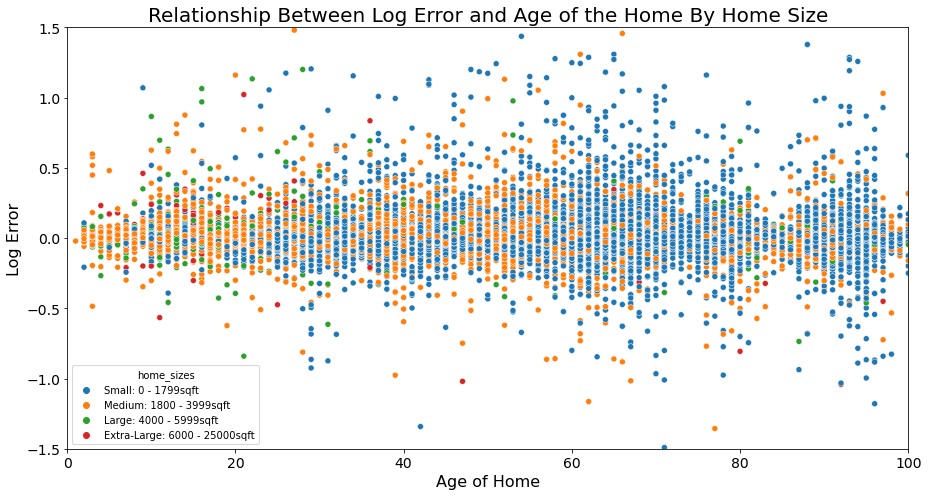

In [45]:
x = train.age
y = train.logerror

# Set size of figure
plt.figure(figsize = (13,7))
# Create scatterplot
ax = sns.scatterplot(data=train, x= x, y= y, hue="home_sizes")
# set x and y limits to 'zoom in'
ax.set(xlim = (0, 100), ylim= (-1.5,1.5)) # set the limits to the desired ones
# fit labels and legend
plt.title('Relationship Between Log Error and Age of the Home By Home Size', fontsize = 20)
plt.xlabel('Age of Home', fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.ylabel('Log Error', fontsize = 16)


plt.tight_layout() 
plt.show()

<Figure size 936x504 with 0 Axes>

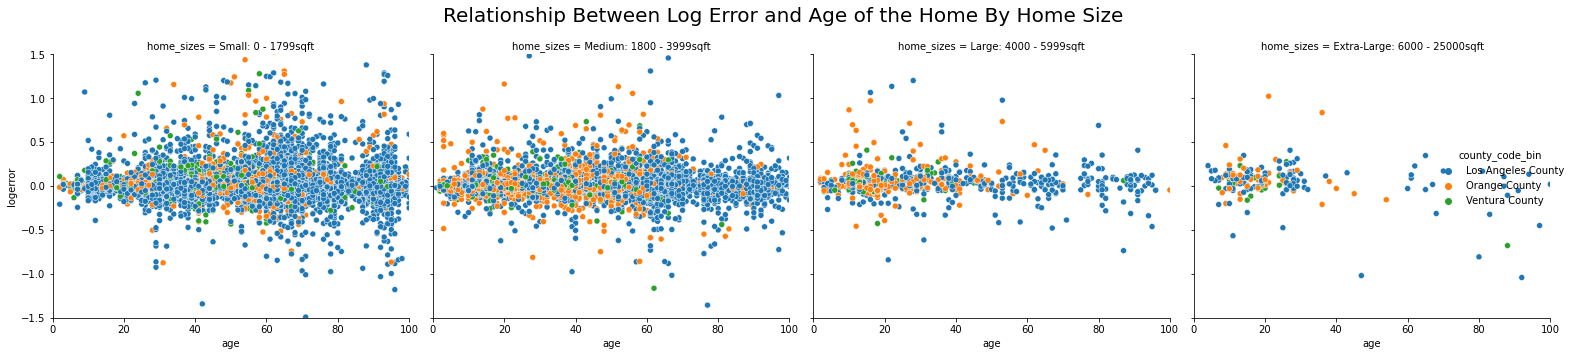

In [46]:
x = train.age
y = train.logerror
# Set size of figure
plt.figure(figsize = (13,7))
# Create scatterplot
ax = sns.relplot(data=train, x= x, y= y, hue="county_code_bin", col="home_sizes")
# set x and y limits to 'zoom in'
ax.set(xlim = (0, 100), ylim= (-1.5,1.5)) # set the limits to the desired ones
# fit labels and legend
plt.suptitle('Relationship Between Log Error and Age of the Home By Home Size', fontsize = 20)
plt.yticks(fontsize = 14)
plt.ylabel('Log Error', fontsize = 16)


plt.tight_layout() 
plt.show()

### Observations
- Log error for small and medium sized homes (400 - 3900 sqft) is significantly more than large and extra large homes, particulalry when a home is over 40 years old. 

### Question 6:

Is there a realtionship between logerror and acres?

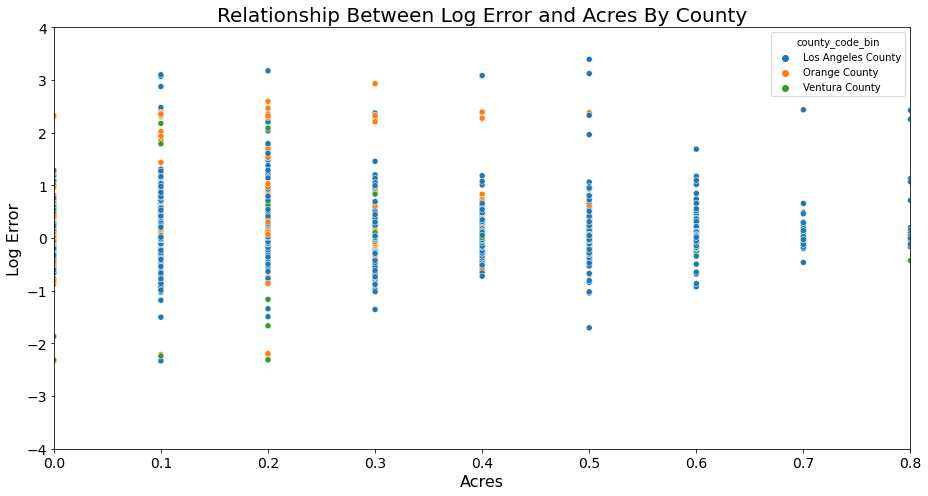

In [47]:
x = train.acres_bin
y = train.logerror
# Set size of figure
plt.figure(figsize = (13,7))
# Create scatterplot
ax = sns.scatterplot(data=train, x= x, y= y, hue="county_code_bin")
# set x and y limits to 'zoom in'
ax.set(xlim = (0, .8), ylim= (-4,4)) # set the limits to the desired ones
# fit labels and legend
plt.title('Relationship Between Log Error and Acres By County', fontsize = 20)
plt.xlabel('Acres', fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.ylabel('Log Error', fontsize = 16)


plt.tight_layout() 
plt.show()

<Figure size 936x504 with 0 Axes>

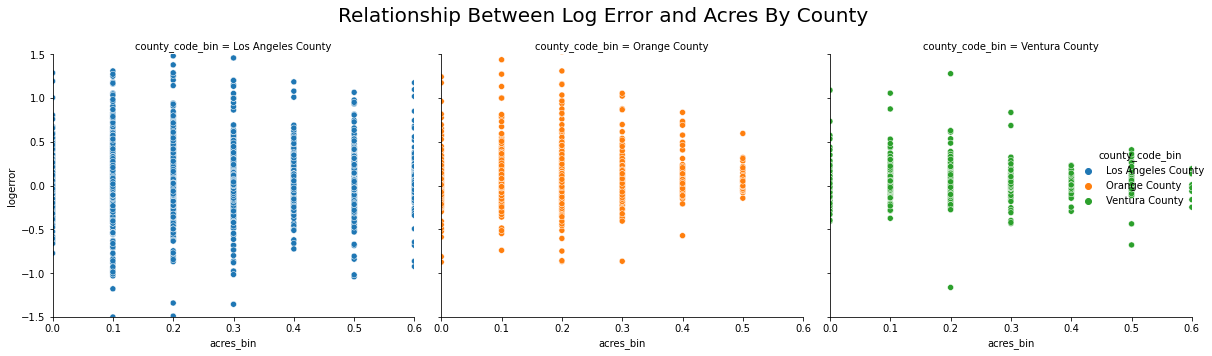

In [48]:
x = train.acres_bin
y = train.logerror
# Set size of figure
plt.figure(figsize = (13,7))
# Create scatterplot
ax = sns.relplot(data=train, x= x, y= y, hue="county_code_bin", col="county_code_bin")
# set x and y limits to 'zoom in'
ax.set(xlim = (0, 0.6), ylim= (-1.5,1.5)) # set the limits to the desired ones
# fit labels and legend
plt.suptitle('Relationship Between Log Error and Acres By County', fontsize = 20)
plt.yticks(fontsize = 14)
plt.ylabel('Log Error', fontsize = 16)


plt.tight_layout() 
plt.show()

In [49]:
target = "logerror"
columns = ['age', 'calculatedfinishedsquarefeet', 'lotsizesquarefeet', 'total_rooms', 'bathroomcnt', 'bedroomcnt', 'latitude', 'longitude']
# split train into X (dataframe, drop target) & y (series, keep target only)
X_train = train[columns]
y_train = train[target]

# split validate into X (dataframe, drop target) & y (series, keep target only)
X_validate = validate[columns]
y_validate = validate[target]

# split test into X (dataframe, drop target) & y (series, keep target only)
X_test = test[columns]
y_test = test[target]

## Scale the Data

In [50]:
#Exploring one version of clustering - scaling only applied to train for now until we determine it is useful
cluster_vars = ['age', 'calculatedfinishedsquarefeet']
cluster_name = 'age_size_cluster'

scaler = sklearn.preprocessing.MinMaxScaler()
# Note that we only call .fit with the training data,
# but we use .transform to apply the scaling to all the data splits.
scaler.fit(X_train[cluster_vars])

X_train_scaled = scaler.transform(X_train[cluster_vars])

## Clustering

### A. AGE & SQFT (age_size_cluster)

In [51]:
# Like our other scikit-learn models, we'll create the instance of the k-means class, then fit it to our data. Once we've done that, we can use the object to make predictions.
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_train_scaled)

kmeans.predict(X_train_scaled)

array([1, 0, 0, ..., 1, 1, 2], dtype=int32)

In [52]:
#The numbers output here are the groups that our K-means algorithm predicted each row to be in. Let's go ahead and store the predicted cluster back into our original dataframe.
train['age_size_cluster'] = kmeans.predict(X_train_scaled)

Text(0.5, 1.0, 'Original Data with Cluster Labels')

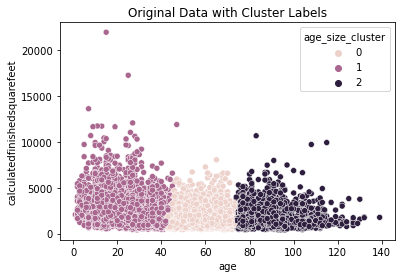

In [53]:
sns.scatterplot(x='age', y='calculatedfinishedsquarefeet', hue='age_size_cluster', data=train)
plt.title('Original Data with Cluster Labels')

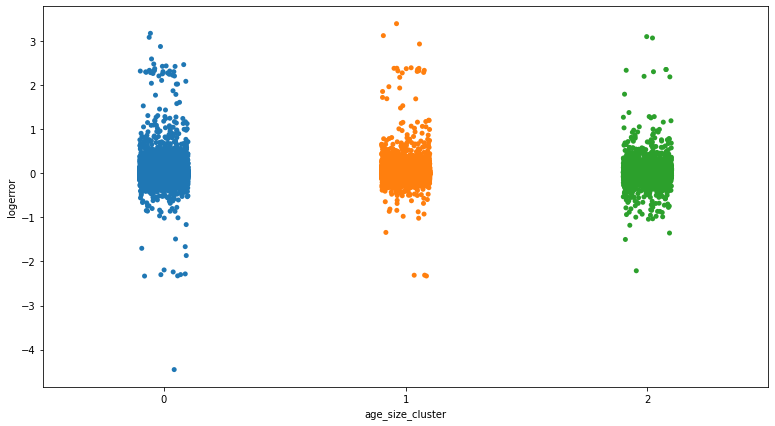

In [54]:
x = train.age_size_cluster
y = train.logerror
plt.figure(figsize = (13,7))
ax = sns.stripplot(x=x, y=y, data= train.sample(1000))

In [55]:
train.groupby('age_size_cluster')['age', 'calculatedfinishedsquarefeet', 'logerror'].mean()

,age,calculatedfinishedsquarefeet,logerror
age_size_cluster,,,
0,58.01,"1,594.32",0.02
1,27.54,"2,126.96",0.02
2,88.74,"1,536.91",0.01


### A. Observation:
- There is no significant difference, which tells us these clusters are not helpful in predicting logerror.
- The clusters appear to be older homes with smaller square footage. 
    - Age 89, 1500 sqft
    - Age 28, 2100 sqft
    - Age 58, 1600 sqft

### B. AGE & LOT SIZE (age_lot_cluster)

In [56]:
#Exploring one version of clustering - scaling only applied to train for now until we determine it is useful
cluster_vars = ['age', 'lotsizesquarefeet']
cluster_name = 'age_lot_cluster'

scaler = sklearn.preprocessing.MinMaxScaler()
# Note that we only call .fit with the training data,
# but we use .transform to apply the scaling to all the data splits.
scaler.fit(X_train[cluster_vars])

X_train_scaled = scaler.transform(X_train[cluster_vars])

In [57]:
# Like our other scikit-learn models, we'll create the instance of the k-means class, then fit it to our data. Once we've done that, we can use the object to make predictions.
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_train_scaled)

kmeans.predict(X_train_scaled)

array([1, 0, 0, ..., 1, 1, 2], dtype=int32)

In [58]:
#The numbers output here are the groups that our K-means algorithm predicted each row to be in. Let's go ahead and store the predicted cluster back into our original dataframe.
train['age_lot_cluster'] = kmeans.predict(X_train_scaled)

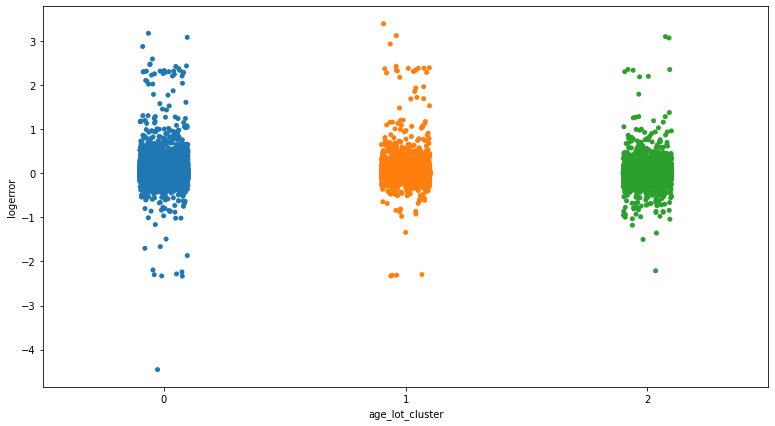

In [59]:
x = train.age_lot_cluster
y = train.logerror
plt.figure(figsize = (13,7))
ax = sns.stripplot(x=x, y=y, data= train.sample(1000))

Text(0.5, 1.0, 'Original Data with Cluster Labels')

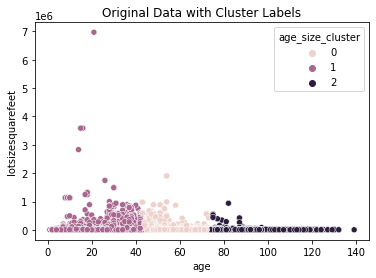

In [60]:
sns.scatterplot(x='age', y='lotsizesquarefeet', hue='age_size_cluster', data=train)
plt.title('Original Data with Cluster Labels')

In [61]:
train.groupby('age_lot_cluster')['age', 'lotsizesquarefeet', 'logerror'].mean()

,age,lotsizesquarefeet,logerror
age_lot_cluster,,,
0,58.45,"20,059.88",0.02
1,28.09,"48,774.73",0.02
2,88.74,"9,026.77",0.01


### B. Observation:
- There is no significant difference, which tells us these clusters are not helpful in predicting logerror.
- The clusters appear to be older homes with large lot size. 
    - Age 29, 49K sqft lot
    - Age 58, 20K sqft lot
    - Age 88, 9k sqft lot

### C. SQFT & LOT SIZE (size_cluster)

In [62]:
#Exploring one version of clustering - scaling only applied to train for now until we determine it is useful
cluster_vars = ['calculatedfinishedsquarefeet', 'lotsizesquarefeet']
cluster_name = 'size_cluster'

scaler = sklearn.preprocessing.MinMaxScaler()
# Note that we only call .fit with the training data,
# but we use .transform to apply the scaling to all the data splits.
scaler.fit(X_train[cluster_vars])

X_train_scaled = scaler.transform(X_train[cluster_vars])

In [85]:
# Like our other scikit-learn models, we'll create the instance of the k-means class, then fit it to our data. Once we've done that, we can use the object to make predictions.
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_train_scaled)

kmeans.predict(X_train_scaled)

array([2, 0, 1, ..., 1, 0, 2], dtype=int32)

In [86]:
#The numbers output here are the groups that our K-means algorithm predicted each row to be in. Let's go ahead and store the predicted cluster back into our original dataframe.
train['size_cluster'] = kmeans.predict(X_train_scaled)

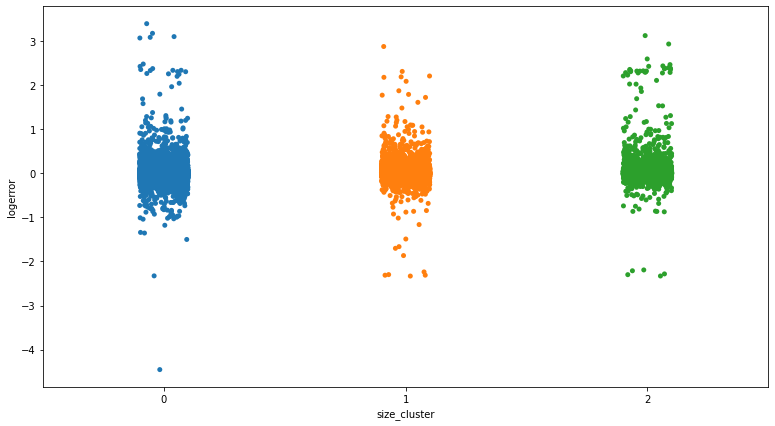

In [87]:
x = train.size_cluster
y = train.logerror
plt.figure(figsize = (13,7))
ax = sns.stripplot(x=x, y=y, data= train.sample(1000))

Text(0.5, 1.0, 'Original Data with Cluster Labels')

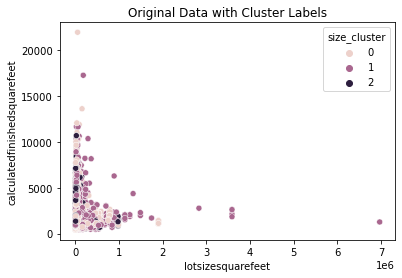

In [88]:
sns.scatterplot(x='lotsizesquarefeet', y='calculatedfinishedsquarefeet', hue='size_cluster', data=train)
plt.title('Original Data with Cluster Labels')

In [89]:
train.groupby('size_cluster')['lotsizesquarefeet', 'calculatedfinishedsquarefeet', 'logerror'].mean()

,lotsizesquarefeet,calculatedfinishedsquarefeet,logerror
size_cluster,,,
0,"29,391.91","1,596.98",0.01
1,"43,734.54","1,842.21",0.02
2,"13,438.39","2,057.04",0.03


### C. Observation:
- There is no significant difference, which tells us these clusters are not helpful in predicting logerror.

- The clusters appear to be small to medium sized square feet and large lot size. 
    - Lot 35K, Home 1,300 sq ft. 
    - Lot 24K, Home 4,500 sq ft. 
    - Lot 18K, Home 2,400 sq ft. 

### D. Latititude & Longitude (location_cluster)

In [90]:
#Exploring one version of clustering - scaling only applied to train for now until we determine it is useful
cluster_vars = ['latitude', 'longitude']
cluster_name = 'location_cluster'

scaler = sklearn.preprocessing.MinMaxScaler()
# Note that we only call .fit with the training data,
# but we use .transform to apply the scaling to all the data splits.
scaler.fit(X_train[cluster_vars])

X_train_scaled = scaler.transform(X_train[cluster_vars])

In [91]:
# Like our other scikit-learn models, we'll create the instance of the k-means class, then fit it to our data. Once we've done that, we can use the object to make predictions.
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_train_scaled)

kmeans.predict(X_train_scaled)

array([1, 0, 2, ..., 2, 0, 1], dtype=int32)

In [92]:
#The numbers output here are the groups that our K-means algorithm predicted each row to be in. Let's go ahead and store the predicted cluster back into our original dataframe.
train['location_cluster'] = kmeans.predict(X_train_scaled)

Text(0.5, 1.0, 'Original Data with Cluster Labels')

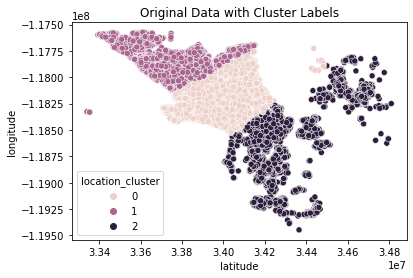

In [93]:
sns.scatterplot(x='latitude', y='longitude', hue='location_cluster', data=train)
plt.title('Original Data with Cluster Labels')

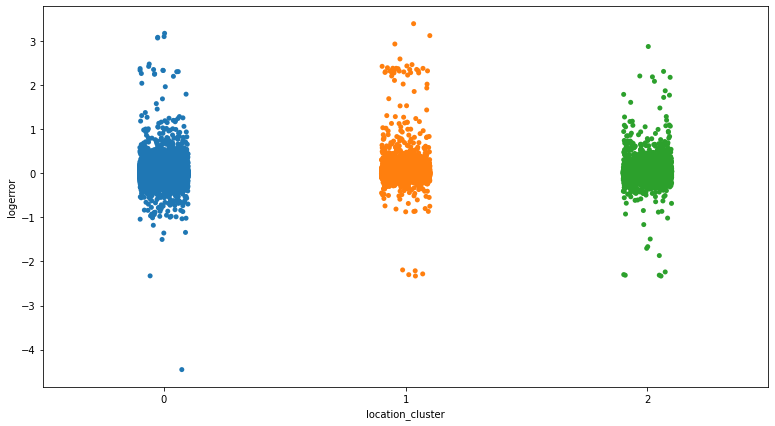

In [94]:
x = train.location_cluster
y = train.logerror
plt.figure(figsize = (13,7))
ax = sns.stripplot(x=x, y=y, data= train.sample(1000))

In [95]:
train.groupby('location_cluster')['latitude', 'longitude', 'logerror'].mean()

,latitude,longitude,logerror
location_cluster,,,
0,"33,994,729.86","-118,211,741.86",0.01
1,"33,748,462.70","-117,834,838.84",0.03
2,"34,314,542.37","-118,564,125.65",0.02


### D. Observation:
- There is no significant difference, which tells us these clusters are not helpful in predicting logerror.

- The clusters appear to be small to medium sized square feet and large lot size. 
    - Lot 35K, Home 1,300 sq ft. 
    - Lot 24K, Home 4,500 sq ft. 
    - Lot 18K, Home 2,400 sq ft. 

## MODELING

## Modeling - Baseline

LinearRegression (OLS)

In [75]:
# We need y_train and y_validate to be dataframes to append the new columns with predicted values. 
y_train = pd.DataFrame(y_train)
y_validate = pd.DataFrame(y_validate)

# compute logerror_pred_median, setting the baseline on the median logerror.
y_train['baseline'] = y_train['logerror'].median()
y_validate['baseline'] = y_train.logerror.median()

LASSO + LARS

In [97]:
# create the model object
lars = LassoLars(alpha=1.0)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series
lars.fit(X_train, y_train.logerror)

# predict train
y_train['logerror_pred_lasso_lars'] = lars.predict(X_train)
y_validate['logerror_pred_lasso_lars']= lars.predict(X_validate)

In [98]:
#'lotsizesquarefeet', 'total_rooms', 'bathroomcnt', 'bedroomcnt', 'latitude', 'longitude']

# create the model object
lars = LassoLars(alpha=1.0)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series
lars.fit(X_train[['age', 'calculatedfinishedsquarefeet']], y_train.logerror)

# predict train
y_train['logerror_pred_lasso_lars_age_sqft'] = lars.predict(X_train[['age', 'calculatedfinishedsquarefeet']])
y_validate['logerror_pred_lasso_lars_age_sqft']= lars.predict(X_validate[['age', 'calculatedfinishedsquarefeet']])

Polynomial Regression

In [99]:
# make the polynomial features to get a new set of features
pf = PolynomialFeatures(degree=2)

# fit and transform X_train_scaled
X_train_degree2 = pf.fit_transform(X_train)

# transform X_validate_scaled & X_test_scaled
X_validate_degree2 = pf.transform(X_validate)
X_test_degree2 = pf.transform(X_test)

In [100]:
# create the model object
lm2 = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm2.fit(X_train_degree2, y_train.logerror)

# predict train
y_train['logerror_pred_lm2'] = lm2.predict(X_train_degree2)
y_validate['logerror_pred_lm2'] = lm2.predict(X_validate_degree2)
#y_test = pd.DataFrame(y_test)

TweedieRegressor (GLM)

In [104]:
pd.options.display.float_format = '{:.6f}'.format
# Create a dataframe with model results for train and validate.
model_results = pd.concat([
    y_train.apply(lambda col: mean_squared_error(y_train.logerror, col)**(1/2)).rename('train'),
    y_validate.apply(lambda col: mean_squared_error(y_validate.logerror, col)**(1/2)).rename('validate')
], axis=1)
model_results.sort_values('validate')

,train,validate
logerror,0.000000,0.000000
logerror_pred_lasso_lars,0.167357,0.159837
logerror_pred_lasso_lars_age_sqft,0.167357,0.159837
logerror_pred_lm2,0.166695,0.160093
baseline,0.167729,0.160098


In [105]:
# simplicity - it is more practical for business
# fewer features vs all the features can give indication whether it can be fewer features is just or nearly as effective. 